<a href="https://colab.research.google.com/github/Ismibaidar/Ismi-Baidar-Aldilla_3333210085_Analitika-Data_Miniproject/blob/main/3333210085_Ismi_Baidar_Aldilla_Analitika_Data__Mini_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
https://drive.google.com/file/d/1QyVxXlO8NxrPGVFZjPqH7sOexxIM1cAI/view?usp=sharing

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

In [ ]:
!gdown --id 1nGXzGBjjmbM2eaLDOgcqrBeUPR-XU6we

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1nGXzGBjjmbM2eaLDOgcqrBeUPR-XU6we
To: /content/Car_sales.csv
100% 16.0k/16.0k [00:00<00:00, 37.1MB/s]


In [ ]:
import pandas as pd
dataset = pd.read_csv('Car_sales.csv')
dataset

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Volvo,V40,3.545,NaN,Passenger,24.40,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,9/21/2011,66.498812
153,Volvo,S70,15.245,NaN,Passenger,27.50,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,11/24/2012,70.654495
154,Volvo,V70,17.531,NaN,Passenger,28.80,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,6/25/2011,71.155978
155,Volvo,C70,3.493,NaN,Passenger,45.50,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,4/26/2011,101.623357


In [ ]:
dataset.shape

(157, 16)

In [ ]:
dataset.columns

Index(['Manufacturer', 'Model', 'Sales_in_thousands', '__year_resale_value',
       'Vehicle_type', 'Price_in_thousands', 'Engine_size', 'Horsepower',
       'Wheelbase', 'Width', 'Length', 'Curb_weight', 'Fuel_capacity',
       'Fuel_efficiency', 'Latest_Launch', 'Power_perf_factor'],
      dtype='object')

In [ ]:
dataset.dtypes

Manufacturer            object
Model                   object
Sales_in_thousands     float64
__year_resale_value    float64
Vehicle_type            object
Price_in_thousands     float64
Engine_size            float64
Horsepower             float64
Wheelbase              float64
Width                  float64
Length                 float64
Curb_weight            float64
Fuel_capacity          float64
Fuel_efficiency        float64
Latest_Launch           object
Power_perf_factor      float64
dtype: object

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         157 non-null    object 
 1   Model                157 non-null    object 
 2   Sales_in_thousands   157 non-null    float64
 3   __year_resale_value  121 non-null    float64
 4   Vehicle_type         157 non-null    object 
 5   Price_in_thousands   155 non-null    float64
 6   Engine_size          156 non-null    float64
 7   Horsepower           156 non-null    float64
 8   Wheelbase            156 non-null    float64
 9   Width                156 non-null    float64
 10  Length               156 non-null    float64
 11  Curb_weight          155 non-null    float64
 12  Fuel_capacity        156 non-null    float64
 13  Fuel_efficiency      154 non-null    float64
 14  Latest_Launch        157 non-null    object 
 15  Power_perf_factor    155 non-null    flo

In [ ]:
dataset.nunique()

Manufacturer            30
Model                  156
Sales_in_thousands     157
__year_resale_value    117
Vehicle_type             2
Price_in_thousands     152
Engine_size             31
Horsepower              66
Wheelbase               88
Width                   78
Length                 127
Curb_weight            147
Fuel_capacity           55
Fuel_efficiency         20
Latest_Launch          130
Power_perf_factor      154
dtype: int64

In [ ]:
dataset.isnull().sum()

Manufacturer            0
Model                   0
Sales_in_thousands      0
__year_resale_value    36
Vehicle_type            0
Price_in_thousands      2
Engine_size             1
Horsepower              1
Wheelbase               1
Width                   1
Length                  1
Curb_weight             2
Fuel_capacity           1
Fuel_efficiency         3
Latest_Launch           0
Power_perf_factor       2
dtype: int64

In [ ]:
dataset['__year_resale_value'].dtypes

dtype('float64')

In [ ]:
dataset['Price_in_thousands'].dtypes

dtype('float64')

In [ ]:
dataset['Engine_size'].dtypes

dtype('float64')

In [ ]:
dataset['Horsepower'].dtypes

dtype('float64')

In [ ]:
dataset['Wheelbase'].dtypes

dtype('float64')

In [ ]:
dataset['Width'].dtypes

dtype('float64')

In [ ]:
dataset['Length'].dtypes

dtype('float64')

In [ ]:
dataset['Curb_weight'].dtypes

dtype('float64')

In [ ]:
dataset['Fuel_capacity'].dtypes

dtype('float64')

In [ ]:
dataset['Fuel_efficiency'].dtypes

dtype('float64')

In [ ]:
dataset['Power_perf_factor'].dtypes

dtype('float64')

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values= np.nan, strategy='mean')
imputer

SimpleImputer()

In [ ]:
imputer = imputer.fit(dataset[['__year_resale_value', 'Price_in_thousands', 'Engine_size', 'Horsepower', 'Wheelbase', 'Width', 'Length', 'Curb_weight', 'Fuel_capacity', 'Fuel_efficiency', 'Power_perf_factor']])
imputer

SimpleImputer()

In [ ]:
dataset[['__year_resale_value', 'Price_in_thousands', 'Engine_size', 'Horsepower', 'Wheelbase', 'Width', 'Length', 'Curb_weight', 'Fuel_capacity', 'Fuel_efficiency', 'Power_perf_factor']] = imputer.transform(dataset[['__year_resale_value', 'Price_in_thousands', 'Engine_size', 'Horsepower', 'Wheelbase', 'Width', 'Length', 'Curb_weight', 'Fuel_capacity', 'Fuel_efficiency', 'Power_perf_factor']])
dataset.isnull().sum()

Manufacturer           0
Model                  0
Sales_in_thousands     0
__year_resale_value    0
Vehicle_type           0
Price_in_thousands     0
Engine_size            0
Horsepower             0
Wheelbase              0
Width                  0
Length                 0
Curb_weight            0
Fuel_capacity          0
Fuel_efficiency        0
Latest_Launch          0
Power_perf_factor      0
dtype: int64

In [ ]:
dataset = dataset.dropna(axis=1)
dataset.isnull().sum()

Manufacturer           0
Model                  0
Sales_in_thousands     0
__year_resale_value    0
Vehicle_type           0
Price_in_thousands     0
Engine_size            0
Horsepower             0
Wheelbase              0
Width                  0
Length                 0
Curb_weight            0
Fuel_capacity          0
Fuel_efficiency        0
Latest_Launch          0
Power_perf_factor      0
dtype: int64

In [ ]:
dataset = dataset.drop('Date', axis=1)
dataset

In [ ]:
dataset.describe()

,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
count,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.00000,157.000000,157.000000,157.000000,157.000000,157.000000
mean,52.998076,18.072975,27.390755,3.060897,185.948718,107.487179,71.15000,187.343590,3.378026,17.951923,23.844156,77.043591
std,68.029422,10.045282,14.259359,1.041299,56.518297,7.616772,3.44079,13.388635,0.626447,3.875440,4.241326,24.980973
min,0.110000,5.160000,9.235000,1.000000,55.000000,92.600000,62.60000,149.400000,1.895000,10.300000,15.000000,23.276272
25%,14.114000,12.545000,18.145000,2.300000,150.000000,103.000000,68.40000,177.600000,2.975000,15.800000,21.000000,60.727447
50%,29.450000,17.710000,23.400000,3.000000,180.000000,107.000000,70.60000,187.800000,3.368000,17.200000,24.000000,72.290355
75%,67.956000,18.140000,31.930000,3.500000,215.000000,112.200000,73.40000,196.100000,3.778000,19.500000,26.000000,89.401935
max,540.561000,67.550000,85.500000,8.000000,450.000000,138.700000,79.90000,224.500000,5.572000,32.000000,45.000000,188.144323


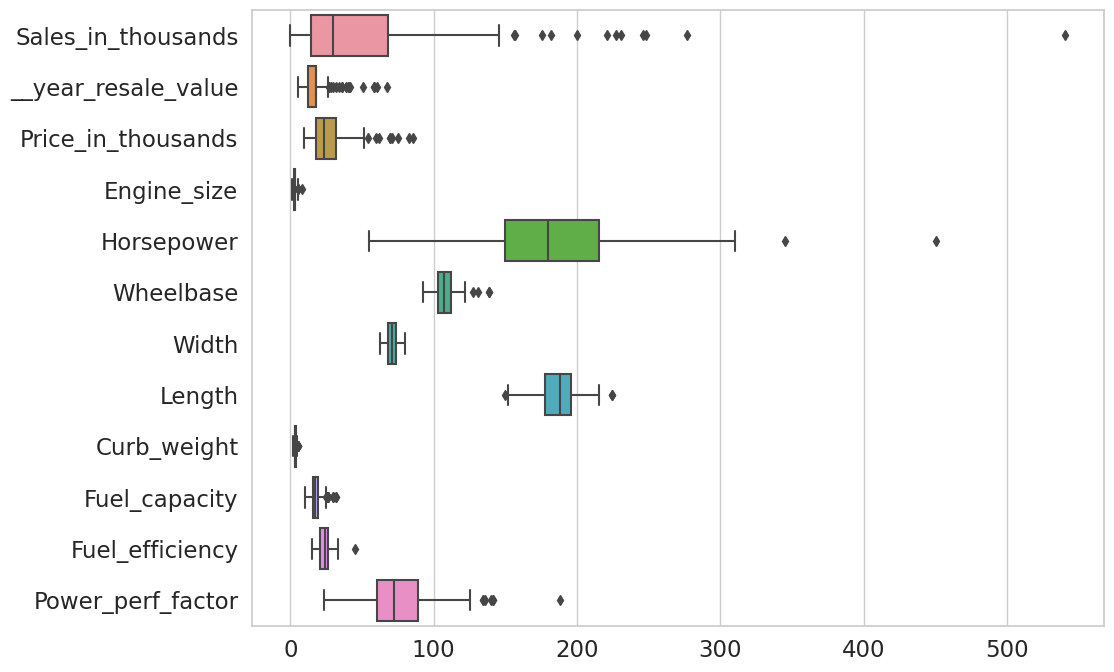

In [ ]:
import seaborn as sns
%matplotlib inline

sns.set(rc={'figure.figsize':(11,8)}, font_scale=1.5, style='whitegrid')

# tips = sns.load_dataset(dataset)
sns.boxplot(data=dataset, orient="h");

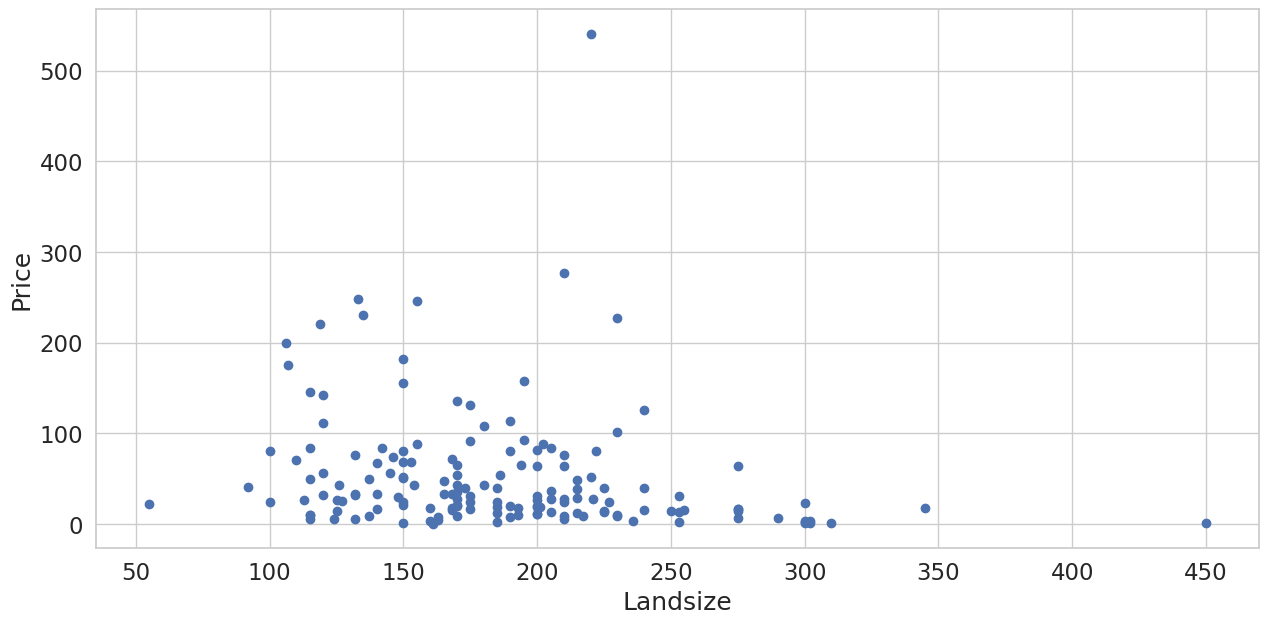

In [ ]:
# Scatter plot
fig, ax = plt.subplots(figsize = (15,7))
ax.scatter(dataset['Horsepower'], dataset['Sales_in_thousands'])
 
# x-axis label
ax.set_xlabel('Landsize')
 
# y-axis label
ax.set_ylabel('Price')
plt.show()

In [ ]:
import sklearn

# IQR Price
Q1 = np.percentile(dataset['Horsepower'], 25,
                   method = 'midpoint')
 
Q3 = np.percentile(dataset['Horsepower'], 75,
                   method = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", dataset.shape)

Old Shape:  (157, 16)


In [ ]:
# Upper bound
upper = Q3 + 1.5 * IQR

# Lower bound
lower = Q1 - 1.5 * IQR

# Finding the indices of the outliers
outliers_upper = dataset[dataset['Horsepower'] > upper].index
outliers_lower = dataset[dataset['Horsepower'] < lower].index

# Concatenate the indices of the outliers
outliers = outliers_upper.append(outliers_lower)

# Removing the outliers
dataset.drop(outliers, inplace=True)

print("New Shape: ", dataset.shape)

New Shape:  (155, 16)


In [ ]:
import sklearn

# IQR Landsize
Q1 = np.percentile(dataset['Sales_in_thousands'], 25,
                   method = 'midpoint')
 
Q3 = np.percentile(dataset['Sales_in_thousands'], 75,
                   method = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", dataset.shape)

Old Shape:  (155, 16)


In [ ]:
# Upper bound
upper = Q3 + 1.5 * IQR

# Lower bound
lower = Q1 - 1.5 * IQR

# Finding the indices of the outliers
outliers_upper = dataset[dataset['Sales_in_thousands'] > upper].index
outliers_lower = dataset[dataset['Sales_in_thousands'] < lower].index

# Concatenate the indices of the outliers
outliers = outliers_upper.append(outliers_lower)

# Removing the outliers
dataset.drop(outliers, inplace=True)

print("New Shape: ", dataset.shape)

New Shape:  (143, 16)


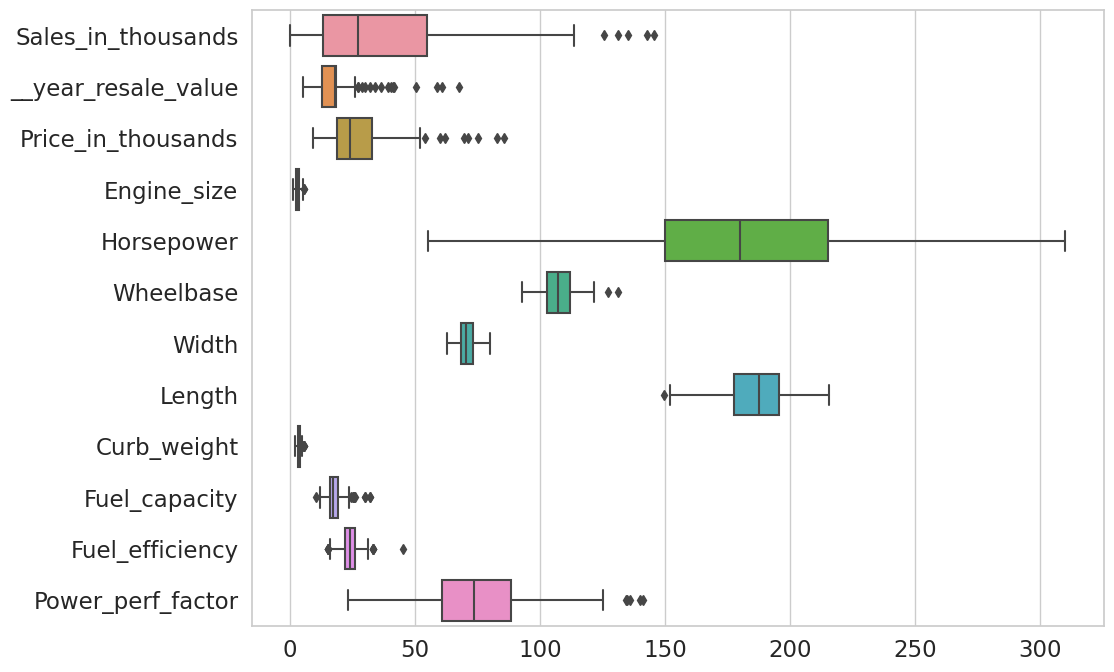

In [ ]:
import seaborn as sns
%matplotlib inline

sns.set(rc={'figure.figsize':(11,8)}, font_scale=1.5, style='whitegrid')

# tips = sns.load_dataset(dataset)
sns.boxplot(data=dataset, orient="h");

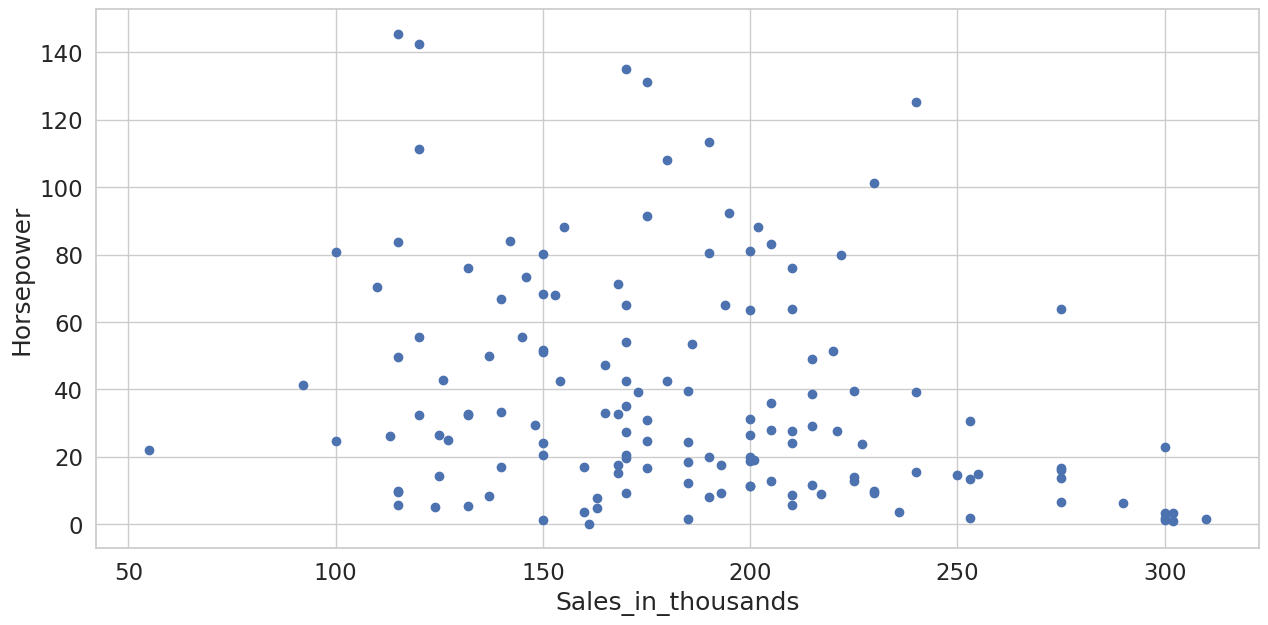

In [ ]:
# Scatter plot
fig, ax = plt.subplots(figsize = (15,7))
ax.scatter(dataset['Horsepower'], dataset['Sales_in_thousands'])
 
# x-axis label
ax.set_xlabel('Sales_in_thousands')
 
# y-axis label
ax.set_ylabel('Horsepower')
plt.show()

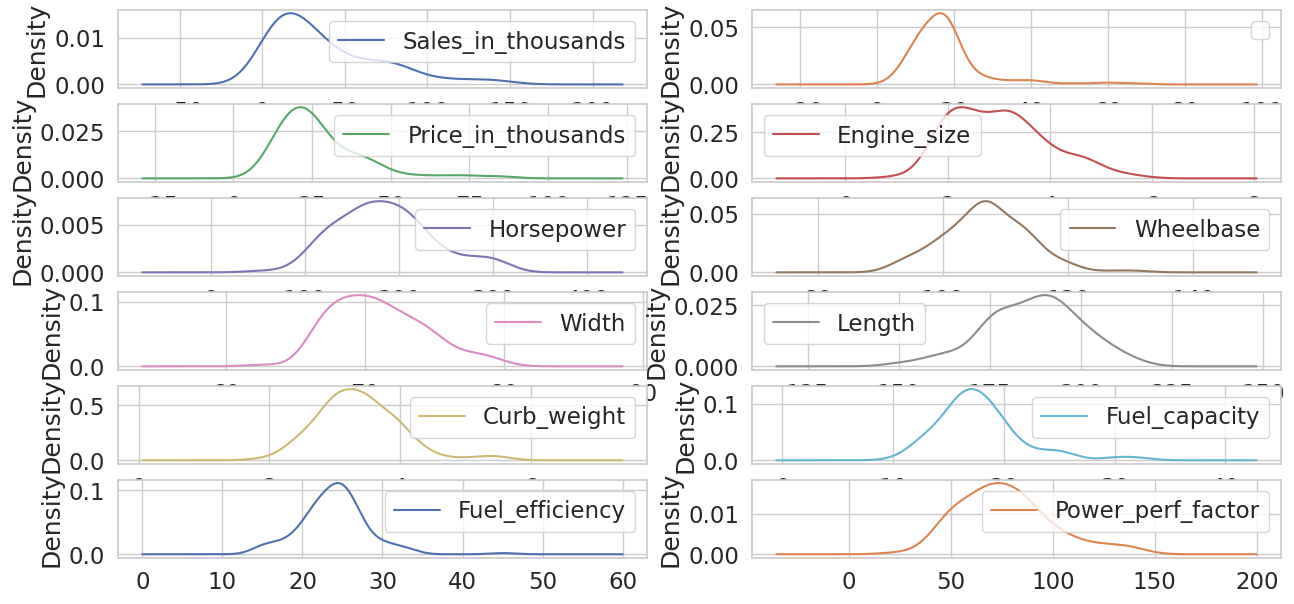

In [ ]:
dataset.plot(kind='kde',subplots=True,layout=(10,2),figsize=(15,12), sharex=False)
plt.show()

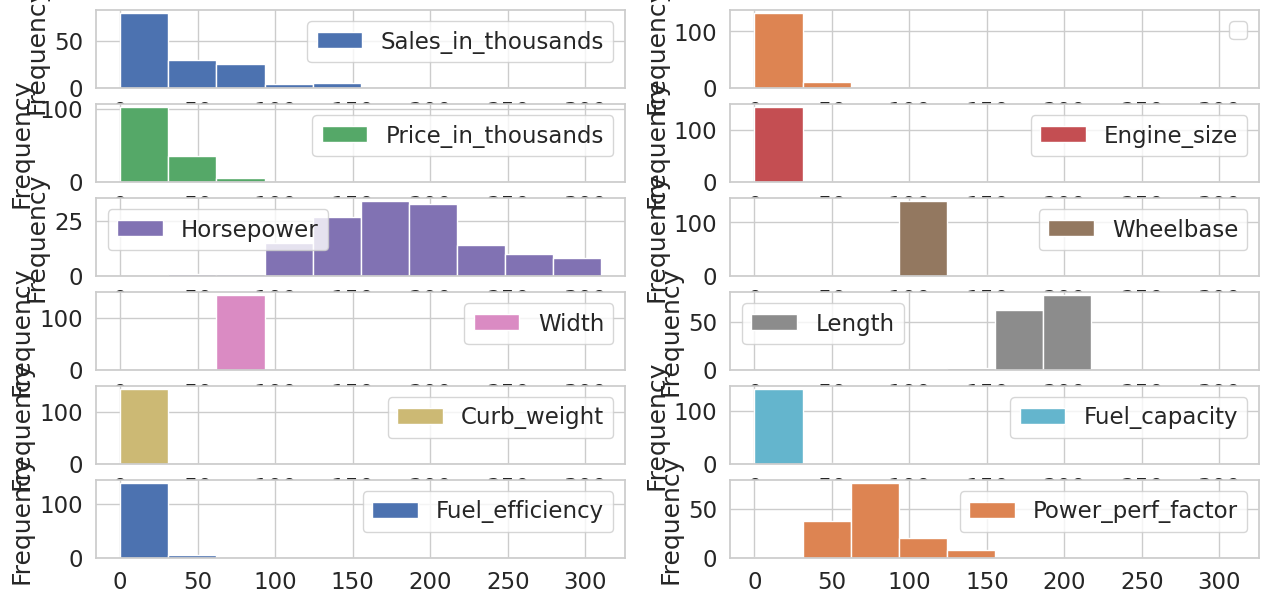

In [ ]:
dataset.plot(kind='hist',subplots=True,layout=(10,2),figsize=(15,12), sharex=False)
plt.show()

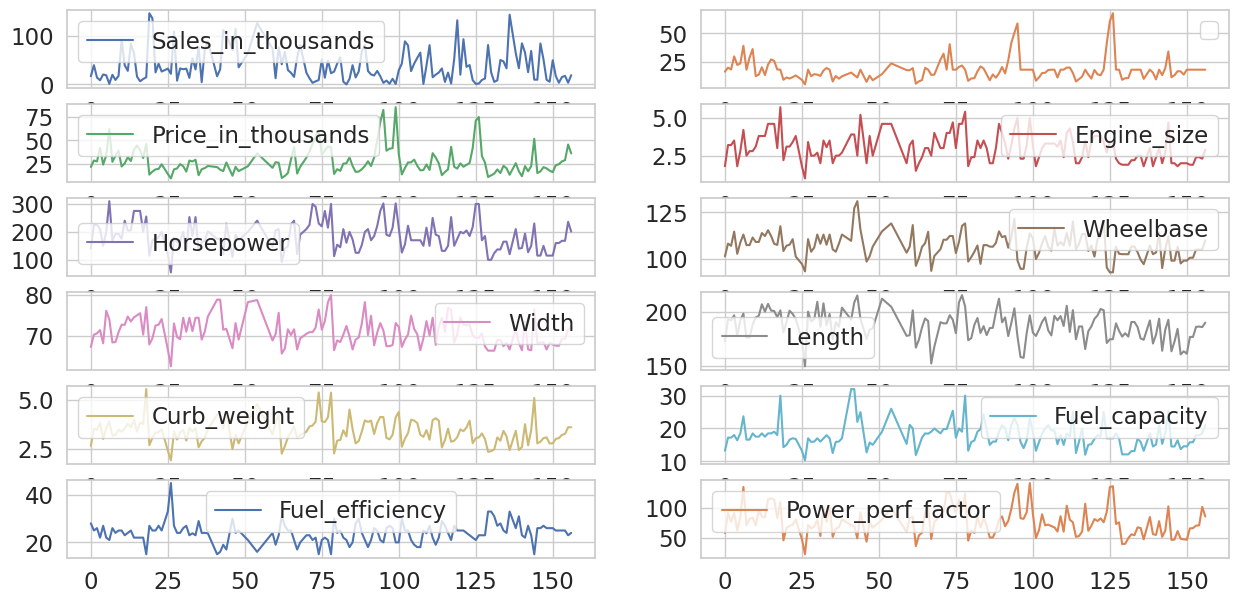

In [ ]:
dataset.plot(kind='line',subplots=True,layout=(10,2),figsize=(15,12), sharex=False)
plt.show()

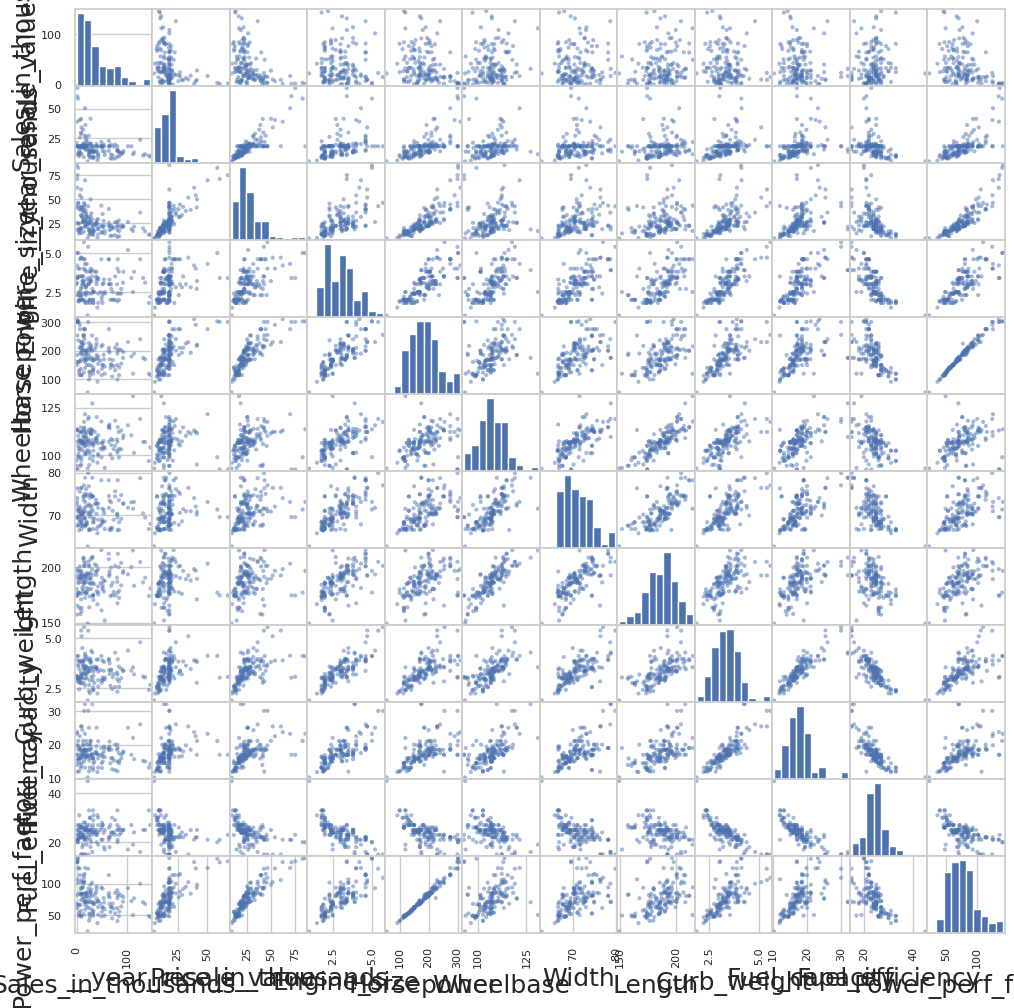

In [ ]:
pd.plotting.scatter_matrix(dataset,figsize=(12,12))
plt.show()

<ipython-input-39-4b443a21f68f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = corr_data.corr()


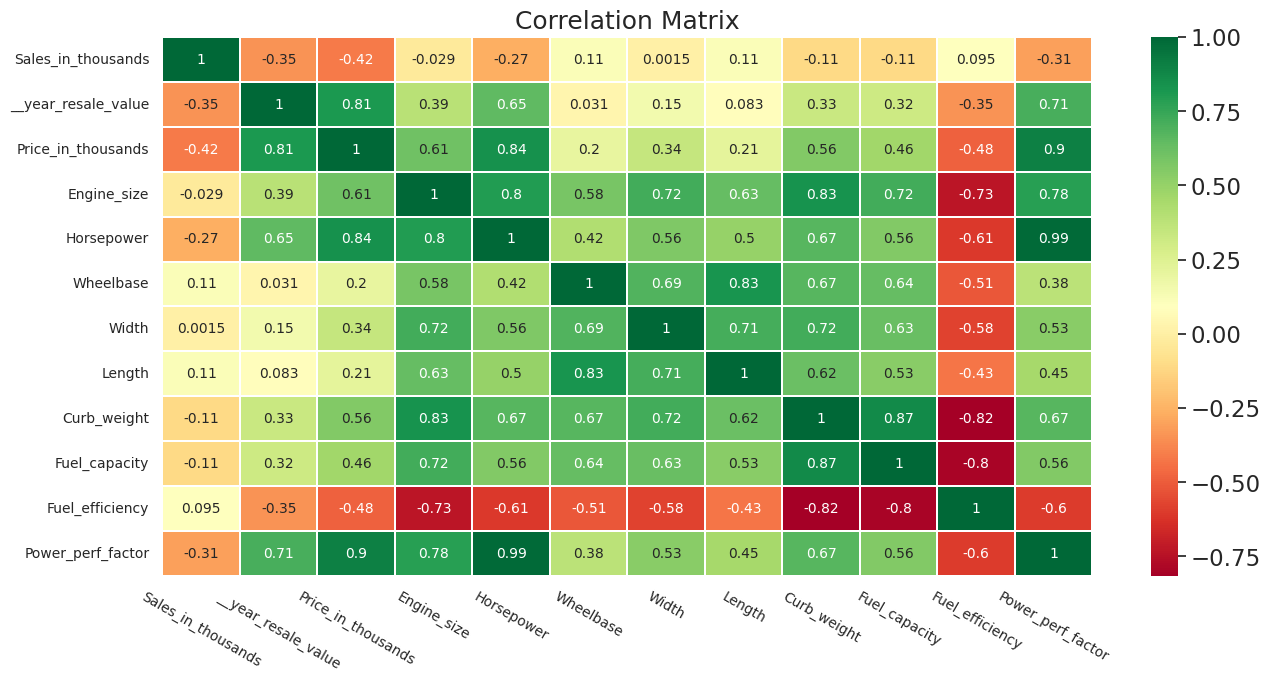

In [ ]:
corr_data = dataset
corr = corr_data.corr()

cor_plot = sns.heatmap(corr,annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':10})
fig=plt.gcf()
fig.set_size_inches(15,7)
plt.xticks(fontsize=10,rotation=-30)
plt.yticks(fontsize=10)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
x = dataset.drop('Vehicle_type', axis=1)
x

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360000,21.500000,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875000,28.400000,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225000,27.390755,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,77.043591
3,Acura,RL,8.588,29.725000,42.000000,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255000,23.990000,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Volvo,V40,3.545,18.072975,24.400000,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,9/21/2011,66.498812
153,Volvo,S70,15.245,18.072975,27.500000,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,11/24/2012,70.654495
154,Volvo,V70,17.531,18.072975,28.800000,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,6/25/2011,71.155978
155,Volvo,C70,3.493,18.072975,45.500000,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,4/26/2011,101.623357


In [ ]:
y = dataset["Vehicle_type"]
y

0      Passenger
1      Passenger
2      Passenger
3      Passenger
4      Passenger
         ...    
152    Passenger
153    Passenger
154    Passenger
155    Passenger
156    Passenger
Name: Vehicle_type, Length: 143, dtype: object

In [ ]:
y.values.reshape(-1,1)

array([['Passenger'],
       ['Passenger'],
       ['Passenger'],
       ['Passenger'],
       ['Passenger'],
       ['Passenger'],
       ['Passenger'],
       ['Passenger'],
       ['Passenger'],
       ['Passenger'],
       ['Passenger'],
       ['Passenger'],
       ['Passenger'],
       ['Passenger'],
       ['Passenger'],
       ['Passenger'],
       ['Passenger'],
       ['Passenger'],
       ['Car'],
       ['Passenger'],
       ['Passenger'],
       ['Passenger'],
       ['Passenger'],
       ['Passenger'],
       ['Passenger'],
       ['Passenger'],
       ['Passenger'],
       ['Passenger'],
       ['Passenger'],
       ['Passenger'],
       ['Passenger'],
       ['Passenger'],
       ['Car'],
       ['Passenger'],
       ['Passenger'],
       ['Passenger'],
       ['Passenger'],
       ['Passenger'],
       ['Car'],
       ['Car'],
       ['Car'],
       ['Car'],
       ['Passenger'],
       ['Passenger'],
       ['Passenger'],
       ['Passenger'],
       ['Car'],
       [

In [ ]:
x = pd.get_dummies(x)
x

,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,...,Latest_Launch_8/9/2011,Latest_Launch_9/10/2012,Latest_Launch_9/11/2011,Latest_Launch_9/14/2012,Latest_Launch_9/21/2011,Latest_Launch_9/22/2012,Latest_Launch_9/25/2011,Latest_Launch_9/26/2011,Latest_Launch_9/28/2011,Latest_Launch_9/3/2011
0,16.919,16.360000,21.500000,1.8,140.0,101.2,67.3,172.4,2.639,13.2,...,0,0,0,0,0,0,0,0,0,0
1,39.384,19.875000,28.400000,3.2,225.0,108.1,70.3,192.9,3.517,17.2,...,0,0,0,0,0,0,0,0,0,0
2,14.114,18.225000,27.390755,3.2,225.0,106.9,70.6,192.0,3.470,17.2,...,0,0,0,0,0,0,0,0,0,0
3,8.588,29.725000,42.000000,3.5,210.0,114.6,71.4,196.6,3.850,18.0,...,0,0,0,0,0,0,0,0,0,0
4,20.397,22.255000,23.990000,1.8,150.0,102.6,68.2,178.0,2.998,16.4,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,3.545,18.072975,24.400000,1.9,160.0,100.5,67.6,176.6,3.042,15.8,...,0,0,0,0,1,0,0,0,0,0
153,15.245,18.072975,27.500000,2.4,168.0,104.9,69.3,185.9,3.208,17.9,...,0,0,0,0,0,0,0,0,0,0
154,17.531,18.072975,28.800000,2.4,168.0,104.9,69.3,186.2,3.259,17.9,...,0,0,0,0,0,0,0,0,0,0
155,3.493,18.072975,45.500000,2.3,236.0,104.9,71.5,185.7,3.601,18.5,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
x.shape

(143, 303)

In [ ]:
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler().fit_transform(x)
std_scale = pd.DataFrame(std_scale)

std_scale

,0,1,2,3,4,5,6,7,8,9,...,293,294,295,296,297,298,299,300,301,302
0,-0.634853,-0.173432,-0.434820,-1.300114,-0.885262,-0.856388,-1.107190,-1.112673,-1.172841,-1.208899,...,-0.083918,-0.119098,-0.083918,-0.083918,-0.119098,-0.083918,-0.119098,-0.083918,-0.083918,-0.083918
1,0.039850,0.189472,0.054825,0.207366,0.778124,0.161452,-0.204607,0.463271,0.225059,-0.157126,...,-0.083918,-0.119098,-0.083918,-0.083918,-0.119098,-0.083918,-0.119098,-0.083918,-0.083918,-0.083918
2,-0.719096,0.019119,-0.016794,0.207366,0.778124,-0.015563,-0.114348,0.394084,0.150229,-0.157126,...,-0.083918,-0.119098,-0.083918,-0.083918,-0.119098,-0.083918,-0.119098,-0.083918,-0.083918,-0.083918
3,-0.885061,1.206428,1.019922,0.530397,0.484585,1.120287,0.126341,0.747710,0.755242,0.053229,...,-0.083918,-0.119098,-0.083918,-0.083918,-0.119098,-0.083918,-0.119098,-0.083918,-0.083918,-0.083918
4,-0.530396,0.435193,-0.258122,-1.300114,-0.689569,-0.649869,-0.836415,-0.682171,-0.601262,-0.367481,...,-0.083918,-0.119098,-0.083918,-0.083918,-0.119098,-0.083918,-0.119098,-0.083918,-0.083918,-0.083918
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,-1.036520,0.003423,-0.229027,-1.192437,-0.493877,-0.959647,-1.016932,-0.789797,-0.531208,-0.525247,...,-0.083918,-0.119098,-0.083918,-0.083918,8.396428,-0.083918,-0.119098,-0.083918,-0.083918,-0.083918
139,-0.685129,0.003423,-0.009042,-0.654051,-0.337323,-0.310589,-0.505468,-0.074856,-0.266912,0.026934,...,-0.083918,-0.119098,-0.083918,-0.083918,-0.119098,-0.083918,-0.119098,-0.083918,-0.083918,-0.083918
140,-0.616472,0.003423,0.083210,-0.654051,-0.337323,-0.310589,-0.505468,-0.051793,-0.185713,0.026934,...,-0.083918,-0.119098,-0.083918,-0.083918,-0.119098,-0.083918,-0.119098,-0.083918,-0.083918,-0.083918
141,-1.038082,0.003423,1.268293,-0.761728,0.993385,-0.310589,0.156427,-0.090231,0.358799,0.184700,...,-0.083918,-0.119098,-0.083918,-0.083918,-0.119098,-0.083918,-0.119098,-0.083918,-0.083918,-0.083918


In [ ]:
from sklearn.preprocessing import MinMaxScaler
x = MinMaxScaler().fit_transform(x)
x = pd.DataFrame(x)

x

,0,1,2,3,4,5,6,7,8,9,...,293,294,295,296,297,298,299,300,301,302
0,0.115598,0.179516,0.160821,0.170213,0.333333,0.223958,0.271676,0.349014,0.202339,0.133641,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.270093,0.235855,0.251295,0.468085,0.666667,0.403646,0.445087,0.660091,0.441120,0.317972,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.096308,0.209409,0.238061,0.468085,0.666667,0.372396,0.462428,0.646434,0.428338,0.317972,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.058305,0.393733,0.429620,0.531915,0.607843,0.572917,0.508671,0.716237,0.531683,0.354839,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.139517,0.274002,0.193470,0.170213,0.372549,0.260417,0.323699,0.433991,0.299973,0.281106,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,0.023623,0.206972,0.198846,0.191489,0.411765,0.205729,0.289017,0.412747,0.311939,0.253456,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
139,0.104086,0.206972,0.239494,0.297872,0.443137,0.320312,0.387283,0.553869,0.357085,0.350230,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
140,0.119807,0.206972,0.256540,0.297872,0.443137,0.320312,0.387283,0.558422,0.370955,0.350230,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
141,0.023265,0.206972,0.475513,0.276596,0.709804,0.320312,0.514451,0.550835,0.463965,0.377880,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(x, y, train_size=0.8, random_state=1, stratify=y)

In [ ]:
from collections import Counter
print("Train distribution", Counter(yTrain))
print("Test distribution", Counter(yTest))

Train distribution Counter({'Passenger': 87, 'Car': 27})
Test distribution Counter({'Passenger': 22, 'Car': 7})


In [ ]:
from sklearn.linear_model import LogisticRegression

models = []
models.append(('LR', LogisticRegression()))

In [ ]:
results_c = []
names_c = []

for name, model in models:
    # define how to split off validation data ('kfold' how many folds)
    kfold = KFold(n_splits=10)    
    # train the model
    cv_results = cross_val_score(model, xTrain, yTrain, cv=kfold, scoring='accuracy')    
    results_c.append(cv_results)
    names_c.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.814394 (0.085860)


In [ ]:
LR = LogisticRegression()
LR.fit(xTrain, yTrain)

LogisticRegression()

In [ ]:
predictions = LR.predict(xTest)
print(accuracy_score(yTest, predictions))

0.8275862068965517


[[ 2  5]
 [ 0 22]]


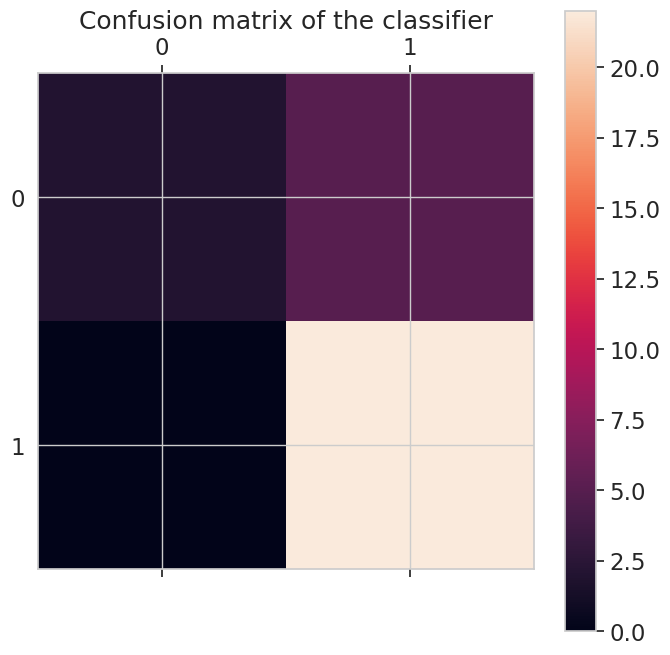

In [ ]:
# Confusion Matrix 
from sklearn.metrics import confusion_matrix
import pylab as pl

print(confusion_matrix(yTest, predictions))

cm = confusion_matrix(yTest, predictions)
pl.matshow(cm)
pl.title('Confusion matrix of the classifier')
pl.colorbar()
pl.show()

In [ ]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(yTest, predictions))

              precision    recall  f1-score   support

         Car       1.00      0.29      0.44         7
   Passenger       0.81      1.00      0.90        22

    accuracy                           0.83        29
   macro avg       0.91      0.64      0.67        29
weighted avg       0.86      0.83      0.79        29

